# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import itertools
from sklearn import linear_model
import timeit

In [2]:
def plotLineAndPoints(l1, l2, *c):

        fir_l1=[]
        for i in range(len(l1)):
            fir_l1.append(l1[i][0])

        sec_l1=[]
        for i in range(len(l1)):
            sec_l1.append(l1[i][1])

        fir_l2=[]
        for i in range(len(l2)):
            fir_l2.append(l2[i][0])

        sec_l2=[]
        for i in range(len(l2)):
            sec_l2.append(l2[i][1])


        x = np.linspace(-100,100,1000)
        plt.scatter(fir_l1,sec_l1,color='r',marker='+',label='l0')
        plt.scatter(fir_l2,sec_l2,color='b',marker='o',label='l1')
        plt.xlabel('x value')
        plt.ylabel('y value')
        plt.legend()
        try:plt.plot(x,-(c[0][2]+c[0][0]*x)/c[0][1],color='g')
        except:print("Not enough arguments to create a line")
pass

The weights for a,b,c respectively are 15.829982240026084 -16.636134948362983 8.97422738132044


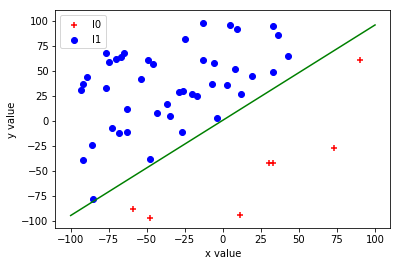

In [3]:
def generate_dataset(k0, k1):
    
    ##Generating random numbers 
    a=random.uniform(-20,40)
    b=random.uniform(-20,40)
    c=random.uniform(-20,10)
    x=random.uniform(-100,100)
    y=random.uniform(-100,100)
    
    
    ##Identifying the points which go on class -1
    lower_points=[]
    lower_x=[]
    lower_y=[]
    label=[]
    d=0
    while(d<=k0-1):
        x=np.random.randint(low=-100, high=100, size=1)
        y=np.random.randint(low=-100,high=100, size=1)
        if(a*x + b*y +c<0):
            lower_points.append([x,y]) 
            lower_x.append(x)
            lower_y.append(y)
            label.append(-1)
            d=d+1

    ##Identifying the points which go on class =1        
    upper_points=[]
    upper_x=[]
    upper_y=[]
    d=0
    while(d<=k1-1):
        x=np.random.randint(low=-100, high=100, size=1)
        y=np.random.randint(low=-100,high=100, size=1)
        if(a*x + b*y +c>0):
            upper_points.append([x,y])
            upper_x.append(x)
            upper_y.append(y)
            label.append(1)
            d=d+1
    
    ##Formatting and printing the output 
    w=[a,b,c]
    upper_points1=pd.DataFrame(upper_points)
    lower_points1=pd.DataFrame(lower_points)
    upper_points1=upper_points1.astype(int)
    lower_points1=lower_points1.astype(int)
    df = pd.concat([lower_points1, upper_points1], ignore_index=True)
    df = df.values
    print("The weights for a,b,c respectively are",w[0],w[1],w[2])
    plotLineAndPoints(upper_points,lower_points, (w[0],w[1],w[2]))
    return(df,label)
pass

##Input for k0 and k1
k0=44
k1=7

##Function Call
X,y=generate_dataset(k0,k1)


### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





Initial Weights taken for w are  [0. 0. 0.]
Final Weights are [ -3.  49. -44.]


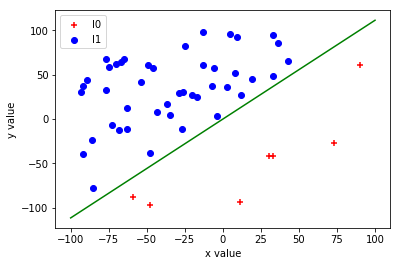

In [4]:
def fit(X, y):
    
    ##Identifying the points for class -1 and 1
    X=pd.DataFrame(X)
    y=pd.DataFrame(y)
    data_complete=pd.concat([X, y], axis=1)
    upper_value=data_complete.loc[data_complete.iloc[:,-1]>-1,]
    upper_value= upper_value.iloc[:, :-1]
    lower_value=data_complete.loc[data_complete.iloc[:,-1]<1,]
    lower_value= lower_value.iloc[:, :-1]
    m=y.size
    lower_points= lower_value.apply(tuple, axis=1)
    upper_points=upper_value.apply(tuple, axis=1)
    lower_points=list(lower_points)
    upper_points=list(upper_points)
    
    ##Initial weights and adding intercept term
    X = np.c_[np.ones(m), X] 
    w=np.zeros(X.shape[1])
    print("Initial Weights taken for w are ",w)
    i=0
    
    
    ##Updatting the weights 
    while i <= X.shape[0]-1:
        check=-1
        result=np.matmul(X[i][:],np.transpose(w))
        if result>0:check=1
        i=i+1
        ans=y.loc[i-1][0]
        if(check!=ans):
            mod=ans*X[i-1][:]
            i=0
            update=np.transpose(w)+np.transpose(mod)
            w=update
    
    ##Printing the weights and the graph 
    print("Final Weights are",w)
    if len(w)==3:
        plotLineAndPoints(upper_points,lower_points, (w[1],w[2],w[0]))

pass

fit(X,y)

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

w represents a line/plane which divides the data. Lets take a point at random, if the line/plane correctly classifies the point then there no need to change w but if it misclassified it them we need to push the w to the opposide of the point. By updating w with the product of vectors x and y, we make sure that the w moves towards x and we keep updating w till its value is on the oppoite side of x.

If $w_1*x_1 + w_2*x_2 +w_3 > 0$ then we predict 1 but if the original output is -1, we reduce $w_1,w_2,w_3$ by $-x_1,-x_2,-1$ respectively to move w towards x. 

Reference : http://work.caltech.edu/library/013.pdf

### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

If the data is not linearly seperable then the model will fail to coverge. 

Some ways to salvage the situation if the data is not linearly seperable 

1.Transfrom the variables to make them linearly seperable
2. Transfrom the coordinate system to make them linearly seperable 

## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

In [5]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    X_norm = X
    X_norm=X_norm.astype(float)
    mu=X.agg('mean')
    sigma=(X.agg('var')) ** 0.5
    X_norm=(X-mu)/sigma 

    return X_norm, mu, sigma

In [6]:
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    m = y.size
    cost = 0
    pred=np.matmul(X,np.transpose(theta))
    error=np.transpose(pred)-np.transpose(y)
    error_transpose=np.transpose(error)
    cost_final=np.matmul(error,error_transpose)
    cost=cost_final/(m)

    return cost

In [7]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        J_history[i] = cost_function(X, y, theta)
        pred=pd.DataFrame(np.matmul(X,np.transpose(theta)))  
        val1=pred-y
        grad=(2*(np.matmul(np.transpose(X),val1)))/m    
        alpha_grad=alpha*grad
        theta=theta-np.transpose(alpha_grad)
        
    return theta, J_history

In [8]:
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    theta = np.zeros((X.shape[1], 1))
    step1=np.matmul(np.transpose(X),X)
    step2=np.linalg.inv(step1) 
    step3=np.matmul(step2,np.transpose(X))
    theta=np.matmul(step3,y)
    return theta

In [9]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [10]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Time taken for Gradient Descent = 1.1592030041085275
Theta computed from gradient descent : 
[[ 2.25328063e+01 -8.81665880e-01  1.01313920e+00 -4.12637219e-02
   7.08927719e-01 -1.99052898e+00  2.71664078e+00 -1.33140144e-02
  -3.08863546e+00  2.18881842e+00 -1.55712552e+00 -2.03943655e+00
   8.56297082e-01 -3.73206799e+00]]


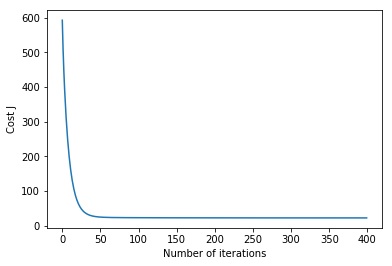

In [11]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent

theta = np.zeros(X.shape[1])
X=pd.DataFrame(X)
y=pd.DataFrame(y)
code_start = timeit.default_timer()
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
code_end = timeit.default_timer()
elapsed_time_GD=code_end - code_start
# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print("Time taken for Gradient Descent =",elapsed_time_GD)
print('Theta computed from gradient descent : \n{}'.format(theta))

In [12]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target

m=y.size
X = np.c_[np.ones(m), X] # Add intercept term to X

code_start = timeit.default_timer()
theta = linearRegression_ols(X, y)
code_end = timeit.default_timer()

OLS_Run_Time=code_end-code_start
Time_diff=elapsed_time_GD-OLS_Run_Time
# Display normal equation's result
print("Time taken for OLS to run =",OLS_Run_Time,"hence for the Boston Dataset OLS is faster by",Time_diff)
print("For bigger datasets Gradient descent should be faster since inverting a matrix is a time consuming function")
print('Theta computed from OLS linear regression : \n{}'.format(theta))

Time taken for OLS to run = 0.001186320491112669 hence for the Boston Dataset OLS is faster by 1.1580166836174148
For bigger datasets Gradient descent should be faster since inverting a matrix is a time consuming function
Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [13]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    X_norm=X_norm.astype(float)
    mu=X.agg('mean')
    sigma=(X.agg('var')) ** 0.5
    X_norm=(X-mu)/sigma 

    return X_norm, mu, sigma

In [14]:
def cost_function_regularization(X, y, theta,lamda):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''

    m = y.size
    cost = 0
    pred=np.matmul(X,np.transpose(theta))
    error=np.transpose(pred)-np.transpose(y)
    error_transpose=np.transpose(error)
    cost_final=np.matmul(error,error_transpose)  + lamda * np.matmul(theta,np.transpose(theta))
    cost=cost_final/(m)

    return cost

In [15]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters,lamda):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        J_history[i] = cost_function_regularization(X, y, theta,lamda)
        pred=pd.DataFrame(np.matmul(X,np.transpose(theta)))  
        val1=pred-y
        grad=np.matmul(np.transpose(X),val1)/m    
        alpha_grad=2*alpha*grad
        factor=1-(learning_rate*lamda/m)
        theta=theta*factor -np.transpose(alpha_grad)

    return theta, J_history

In [16]:
# load dataset
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [17]:
# Normalize features
print('Normalizing Features ...')
m=y.size
X, mu, sigma = feature_normalization_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Theta computed from Regularized gradient descent : 
[[ 2.25328063e+01 -8.81665880e-01  1.01313920e+00 -4.12637219e-02
   7.08927719e-01 -1.99052898e+00  2.71664078e+00 -1.33140144e-02
  -3.08863546e+00  2.18881842e+00 -1.55712552e+00 -2.03943655e+00
   8.56297082e-01 -3.73206799e+00]]


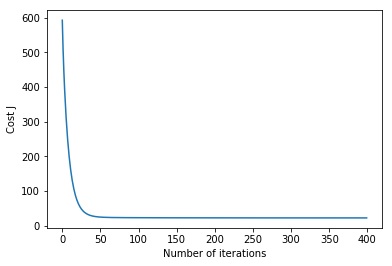

In [18]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400
lamda=0

# Initialize theta and execute gradient descent
X=pd.DataFrame(X)
y=pd.DataFrame(y)
theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters,lamda)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from Regularized gradient descent : \n{}'.format(theta))

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

In [23]:
## Code for function 1
###Method 
##1. According to the function given above we need to multiply x1,x2,x3,x4,x5 with different powers ranging from 0 to 3.Hence there is a total of 1024 combinations 
##2.In the first question the net power is 1 hence only combinaitons where the power of the 5 variables that add up to 1 is possible. 
####The powers for x1,x2,x3,x4,x5 respectively are (0,0,0,0,1), (0,0,0,1,0), (0,0,1,0,0), (0,1,0,0,0), (1,0,0,0,0)
##3.The different combinations produce the variables x5,x4,x3,x2,x1 
##4.For the 5 variables round off and run Linear regression model 
##5.Print the theta value and the dataset  


##Reading the file 
data1=pd.read_csv("D:/Sem 1 IU My Stuff/AML/Assignment 2/data1.csv",header=None)
Raw_Data = data1.iloc[:, :-1]
y = data1.iloc[:,-1]
m=y.size

##Rounding off and adding the intercept term 
Raw_Data=np.c_[np.ones(m), Raw_Data] # Add intercept term to the dataset
Raw_Data=Raw_Data.round(0)

##OLS Method 
theta = np.zeros((Raw_Data.shape[1], 1))
step1=np.matmul(np.transpose(Raw_Data),Raw_Data)
step2=np.linalg.inv(step1) 
step3=np.matmul(step2,np.transpose(Raw_Data))
theta=np.matmul(step3,y)

##Predicting the Theta values 
pred=np.dot(Raw_Data,theta)
pred=pd.DataFrame(pred)
Raw_Data=pd.DataFrame(Raw_Data)

##Formatting & Printing the outcomes 
df = pd.concat([Raw_Data.iloc[:, 1:],y,pred], axis=1)
df.columns=['x1','x2','x3','x4','x5','Acutal y','Pred y']
df['Squared Error']=((df['Pred y']-df['Acutal y'])**2)
Error_mean=round(df['Squared Error'].mean(),2)

print("The Theta values for intercept,x1,x2,x3,x4,x5 are ",theta)

print("The Mean Square Error of the model is ",Error_mean)

print("Printing the Data with prediction")

print(df)

The Theta values for intercept,x1,x2,x3,x4,x5 are  [ 1.19401075e+01  1.82122405e+00 -3.66067052e+00 -4.06977276e-02
  3.73138891e+00 -1.16506940e-02]
The Mean Square Error of the model is  2.9
Printing the Data with prediction
      x1   x2   x3   x4   x5  Acutal y     Pred y  Squared Error
0    0.0  0.0  0.0 -1.0 -2.0     8.320   8.232020       0.007740
1   -0.0 -2.0 -1.0  0.0 -0.0    19.054  19.302146       0.061577
2   -1.0 -0.0  1.0 -3.0  0.0     0.910  -1.115981       4.104599
3    2.0  1.0  0.0  0.0  2.0    13.786  11.898584       3.562340
4   -0.0 -0.0  1.0 -0.0  1.0    10.876  11.887759       1.023656
5   -1.0 -1.0  1.0 -1.0  1.0     8.089   9.995817       3.635950
6   -0.0 -1.0 -0.0  0.0  1.0    17.964  15.589127       5.640020
7    2.0  1.0 -1.0  1.0 -1.0    13.885  15.705622       3.314666
8   -0.0  0.0 -1.0 -0.0 -1.0     8.236  11.992456      14.110961
9    0.0  0.0 -0.0  0.0 -1.0    12.081  11.951758       0.016703
10   0.0  1.0  1.0 -1.0 -1.0     7.192   4.519001       7.

### Methodology and answer for function 2

In [20]:
##Reading the Dataset 
###Method 
##1. Accoding to the function given above we need to multiply x1,x2,x3,x4,x5 after raising them to different powers ranging from 0 to 3.
##2. Hence there is a total of 1024 combinations features 
##3. For the second question we need to use all 1024 combination 
##4. Round off the dataset to zero decimals and Create a model will all 1024 variables using sklearn 
##5. Print the Theta values and the compare the prediction with actual

##5.Print the theta value and the dataset 
data2=pd.read_csv("D:/Sem 1 IU My Stuff/AML/Assignment 2/data2.csv",header=None)
Raw_Data = data2.iloc[:, :-1]
Raw_Data=Raw_Data.round(0)
y = data2.iloc[:,-1]

##Creating all 1024 combinations 
lst = list(itertools.product([0,1,2,3], repeat=5))
lst=pd.DataFrame(lst)

##Creating the Dataset with 1024 variables 
print("Calculating the features")
X = np.zeros(shape=(1000,1024))
X=pd.DataFrame(X)

for k in range(0,1024):
    X[k]=(Raw_Data[0]**(lst.loc[k][0])) * (Raw_Data[1]**(lst.loc[k][1])) * (Raw_Data[2]**(lst.loc[k][2])) * (Raw_Data[3]**(lst.loc[k][3])) * (Raw_Data[4]**(lst.loc[k][4])) 

##Creating a Linear Regression Model 
LR = linear_model.LinearRegression()
LR.fit(X, y)
Theta=LR.coef_

# Make predictions using the testing set
y_pred = LR.predict(X)
Sq_Error=(y-y_pred)**2
MSE=Sq_Error.mean()
print("The Mean Squared Error of the model is ",MSE)
print("The 1024 values of theta are ",pd.DataFrame(Theta))

df = pd.concat([pd.DataFrame(y),pd.DataFrame(y_pred)], axis=1)
df.columns=['Actual y','Pred y']

print("Printing the Data with prediction")

print(df)

Calculating the features
The Mean Squared Error of the model is  13.444005307934265
The 1024 values of theta are                   0
0    -1.132418e+11
1     5.250200e-01
2    -5.559257e-02
3    -1.893635e-01
4     5.654923e-01
5    -2.725860e+00
6    -1.030553e+00
7    -9.311262e-02
8    -1.991737e+00
9     7.544298e-01
10   -1.452923e-02
11   -1.739118e-01
12    4.484105e-01
13    4.212968e-01
14    1.250209e+00
15    5.430694e-01
16    1.272638e+00
17   -9.722614e-01
18   -6.159011e+00
19   -1.939169e+00
20   -2.581720e-01
21   -8.637031e+09
22    8.373419e+09
23    9.671342e+09
24   -1.441901e+00
25   -3.825889e+09
26    2.372479e+09
27    1.453410e+09
28    2.312472e+00
29    4.704274e+09
...            ...
994   7.402584e+09
995  -2.085958e+10
996   3.570246e+10
997   9.492195e+09
998  -2.422238e+10
999   1.362139e+10
1000  5.687752e+09
1001 -2.557515e+09
1002  4.484101e+09
1003  3.016835e+10
1004 -4.240525e+10
1005  2.825483e+10
1006  2.618974e+10
1007 -8.169570e+10
1008  1.0882